# Análisis y Limpieza de Datos del Conjunto H1N1.csv


Introducción
En este Jupyter Notebook, nos enfocaremos en la limpieza y el análisis preliminar del conjunto de datos h1n1.csv, que contiene información relacionada con la incidencia del virus H1N1 en diferentes países. La limpieza de datos es un paso crucial en cualquier proceso de análisis de datos, ya que datos mal formateados, incompletos o incorrectos pueden llevar a conclusiones erróneas.

Este notebook está diseñado para proporcionar una visión práctica de las técnicas comunes de limpieza de datos utilizando Python y sus librerías más populares. Sin embargo, no entraremos en detalle sobre la funcionalidad específica de cada función de Python utilizada, ya que esto se cubrirá en profundidad en el siguiente curso de Python. En su lugar, nos centraremos en aplicar estas funciones para preparar el conjunto de datos para un análisis posterior.


## Tabla de Contenido

1. [Preparación del Entorno](#Preparación-del-Entorno)
2. [Carga de Datos](#Carga-de-Datos)
3. [Exploración Inicial de Datos](#Exploración-Inicial-de-Datos)
4. [Limpieza de Datos](#Limpieza-de-Datos)
   - [Detección y Tratamiento de Valores Faltantes](#Detección-y-Tratamiento-de-Valores-Faltantes)
   - [Corrección de Tipos de Datos](#Corrección-de-Tipos-de-Datos)
   - [Limpieza de Formatos de Fecha](#Limpieza-de-Formatos-de-Fecha)
   - [Eliminación de Columnas Innecesarias](#Eliminación-de-Columnas-Innecesarias)
   - [Tratamiento de Valores Atípicos](#Tratamiento-de-Valores-Atípicos)
   - [Normalización de Texto en Columnas Categóricas](#Normalización-de-Texto-en-Columnas-Categóricas)
5. [Análisis de Datos Limpio](#Análisis-de-Datos-Limpio)
6. [Conclusiones](#Conclusiones)
7. [Referencias](#Referencias)

## Preparación del Entorno

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6] 

## Carga de Datos

In [2]:
try:
    data = pd.read_csv('../datasets/h1n1.csv', encoding='latin1')
except UnicodeDecodeError:
    try:
        data = pd.read_csv('h1n1.csv', encoding='cp1252')
    except UnicodeDecodeError:
        print("Error: La codificación del archivo no es 'latin1' ni 'cp1252'.")


## Exploración Inicial de Datos

In [3]:
# Muestra la información general del DataFrame
print("Información del DataFrame:")
data.info()

# Muestra las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
display(data.head())

# Muestra el resumen estadístico del DataFrame, transpuesto para mejor visualización
print("\nResumen estadístico del DataFrame (transpuesto):")
display(data.describe().T)

# Muestra una fila aleatoria del DataFrame para obtener una muestra de los datos
print("\nUna fila aleatoria del DataFrame:")
display(data.sample())

# Conteo de valores únicos en cada columna para identificar la diversidad de los datos
print("\nConteo de valores únicos por columna:")
display(data.nunique())

# Muestra la cantidad de valores faltantes por columna
print("\nCantidad de valores faltantes por columna:")
display(data.isnull().sum())

# Muestra el porcentaje de valores faltantes por columna
print("\nPorcentaje de valores faltantes por columna:")
display((data.isnull().sum() / len(data)) * 100)


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1822 non-null   object 
 1   Cases        1822 non-null   int64  
 2   Deaths       1821 non-null   float64
 3   Update Time  1822 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 57.1+ KB

Primeras filas del DataFrame:


,Country,Cases,Deaths,Update Time
0,Algeria,5,0.0,7/6/2009 9:00
1,Antigua and Barbuda,2,0.0,7/6/2009 9:00
2,Argentina,2485,60.0,7/6/2009 9:00
3,Australia,5298,10.0,7/6/2009 9:00
4,Austria,19,0.0,7/6/2009 9:00



Resumen estadístico del DataFrame (transpuesto):


,count,mean,std,min,25%,50%,75%,max
Cases,1822.0,901.063666,5264.291392,1.0,3.0,13.5,88.75,94512.0
Deaths,1821.0,4.315761,25.793340,0.0,0.0,0.0,0.00,429.0



Una fila aleatoria del DataFrame:


,Country,Cases,Deaths,Update Time
137,Antigua and Barbuda,2,0.0,7/3/2009 9:00



Conteo de valores únicos por columna:


Country        152
Cases          385
Deaths          58
Update Time     22
dtype: int64


Cantidad de valores faltantes por columna:


Country        0
Cases          0
Deaths         1
Update Time    0
dtype: int64


Porcentaje de valores faltantes por columna:


Country        0.000000
Cases          0.000000
Deaths         0.054885
Update Time    0.000000
dtype: float64

## Limpieza de Datos


En este proceso, abordaremos tareas como:

- **Detección y Tratamiento de Valores Faltantes:** A veces, la información puede estar incompleta. Decidiremos si esa información incompleta se ignora, se rellena con un valor estándar, o se maneja de alguna otra manera.
- **Corrección de Tipos de Datos:** Nos aseguraremos de que la información esté en el formato correcto. Por ejemplo, queremos que las fechas se entiendan como fechas, y los números como números.
- **Eliminación de Columnas Innecesarias:** Si hay partes de la información que no necesitamos para nuestro análisis, podemos quitarlas para simplificar nuestro trabajo.
- **Tratamiento de Valores Atípicos:** A veces, encontrarás datos que son muy diferentes a todo lo demás (por ejemplo, un precio extremadamente alto en una lista de precios de vivienda). Estos datos "atípicos" pueden distorsionar el análisis, así que decidiremos cómo manejarlos.
- **Normalización de Texto en Columnas Categóricas:** Esto significa hacer que la información textual sea consistente. Por ejemplo, si algunas filas usan "EE.UU." y otras "Estados Unidos", decidiremos usar un único término para todos.
- **Limpieza de Formatos de Fecha:** Las fechas pueden escribirse de muchas maneras (como "1 de enero" o "01/01"). Convertiremos todas las fechas a un único formato estándar.

El objetivo de limpiar los datos es asegurarnos de que la información con la que trabajaremos es precisa y está organizada. Esto es crucial para cualquier análisis confiable y para tomar decisiones informadas basadas en esos datos.

### Corrección de Tipos de Datos


In [4]:
data['Country'] = data['Country'].astype('category')

# Optimizar el tamaño de 'Cases' y 'Deaths' cambiándolos a tipos de entero más pequeños
data['Cases'] = pd.to_numeric(data['Cases'], downcast='integer')
data['Deaths'] = pd.to_numeric(data['Deaths'], downcast='integer', errors='coerce')  # Convertir primero a NaN los no numéricos
data['Deaths'] = data['Deaths'].astype('Int32')

# Cambiar nombres de columnas a nombres más adecuados
data.rename(columns={
    'Country': 'country',
    'Cases': 'cases',
    'Deaths': 'deaths',
    'Update Time': 'update_time'
}, inplace=True)

# Verificar los cambios realizados
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      1822 non-null   category
 1   cases        1822 non-null   int32   
 2   deaths       1821 non-null   Int32   
 3   update_time  1822 non-null   object  
dtypes: Int32(1), category(1), int32(1), object(1)
memory usage: 39.2+ KB


,country,cases,deaths,update_time
0,Algeria,5,0,7/6/2009 9:00
1,Antigua and Barbuda,2,0,7/6/2009 9:00
2,Argentina,2485,60,7/6/2009 9:00
3,Australia,5298,10,7/6/2009 9:00
4,Austria,19,0,7/6/2009 9:00


### Limpieza de Formatos de Fecha


In [5]:
# Convertir 'update_time' a datetime con detección automática de formato
data['update_time'] = pd.to_datetime(data['update_time'], errors='coerce')

# Verificar los cambios realizados y el tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   country      1822 non-null   category      
 1   cases        1822 non-null   int32         
 2   deaths       1821 non-null   Int32         
 3   update_time  1822 non-null   datetime64[ns]
dtypes: Int32(1), category(1), datetime64[ns](1), int32(1)
memory usage: 39.2 KB


In [6]:
# Para checar el rango de las fechas en la columna 'update_time'
fecha_minima = data['update_time'].min()
fecha_maxima = data['update_time'].max()

fecha_minima, fecha_maxima

(Timestamp('2009-05-23 08:00:00'), Timestamp('2009-07-06 09:00:00'))

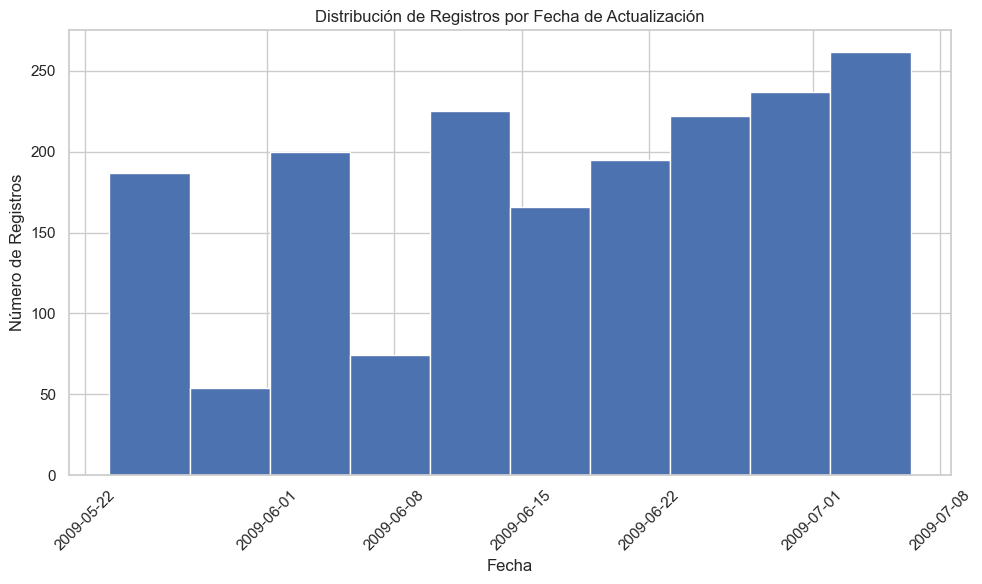

In [7]:
data['update_time'].hist()
plt.title('Distribución de Registros por Fecha de Actualización')
plt.xlabel('Fecha')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar espacio a las etiquetas
plt.show()

### Detección y Tratamiento de Valores Faltantes

In [8]:
print("Valores faltantes por columna:")
print(data.isnull().sum())

Valores faltantes por columna:
country        0
cases          0
deaths         1
update_time    0
dtype: int64


In [9]:
data['deaths'].fillna(data['deaths'].median(), inplace=True)
# Verificar los cambios realizados
print("\nValores faltantes por columna después del tratamiento:")
print(data.isnull().sum())


Valores faltantes por columna después del tratamiento:
country        0
cases          0
deaths         0
update_time    0
dtype: int64


### Eliminación de Columnas Innecesarias

En el proceso de limpieza y preparación de datos, una de las decisiones importantes es determinar si todas las columnas (o variables) presentes en nuestro conjunto de datos son relevantes para el análisis o modelo que planeamos realizar. Las columnas que no aportan información útil o que son redundantes pueden ser eliminadas para simplificar el análisis y mejorar la eficiencia del procesamiento de datos.

#### ¿Cuándo considerar la eliminación de columnas?

- **Irrelevancia:** Si una columna no está relacionada con la pregunta de investigación o el objetivo del análisis.
- **Redundancia:** Si la información de una columna ya está representada por otra(s) columna(s).
- **Demasiados Valores Faltantes:** Si una gran parte de los datos en una columna está ausente, haciendo poco práctico o poco fiable su uso.
- **Bajo Variabilidad:** Si una columna tiene el mismo valor para la gran mayoría de las observaciones, proporcionando poca información.

#### Consideraciones

Imaginemos que en nuestro conjunto de datos `h1n1.csv` tenemos una columna llamada `hora_de_carga`, que indica la hora a la que se cargaron los datos en el sistema. Si descubrimos que todos los datos fueron cargados siempre a la misma hora, digamos a las "9:00 AM", esto haría que la columna `hora_de_carga` tuviera una baja variabilidad y por lo tanto ofreciera poca información útil para nuestro análisis.

Además, consideremos una columna `cargado_por`, que indica el nombre de la persona que ingresó los datos al sistema. Si todos los registros en nuestro conjunto de datos fueron cargados por la misma persona, esta columna también tendría una variabilidad muy baja y podría considerarse redundante para el propósito del análisis.

En tales casos, aunque estas columnas podrían tener algún interés administrativo o de auditoría, desde la perspectiva del análisis de la incidencia del virus H1N1, podrían no aportar valor y, por lo tanto, podrían ser candidatas para eliminación con el fin de simplificar el conjunto de datos.

In [10]:
data['update_time'].dt.hour.value_counts(normalize=True)

9     0.273875
7     0.270033
6     0.246981
8     0.076839
12    0.048847
17    0.042261
14    0.041164
Name: update_time, dtype: float64

Si mi objetivo de análisis no está relacionado con la hora del día y no planeo utilizar la hora en mis preguntas o análisis, considero apropiado eliminar la hora de la fecha en mi conjunto de datos. Al hacerlo, simplificaré el conjunto de datos y me enfocaré únicamente en la fecha, lo que hará que mi análisis sea más claro y más relevante para mis objetivos específicos de investigación.

In [11]:
# Truncar la hora de la fecha
data['update_time'] = data['update_time'].dt.floor('D')

### Tratamiento de Valores Atípicos


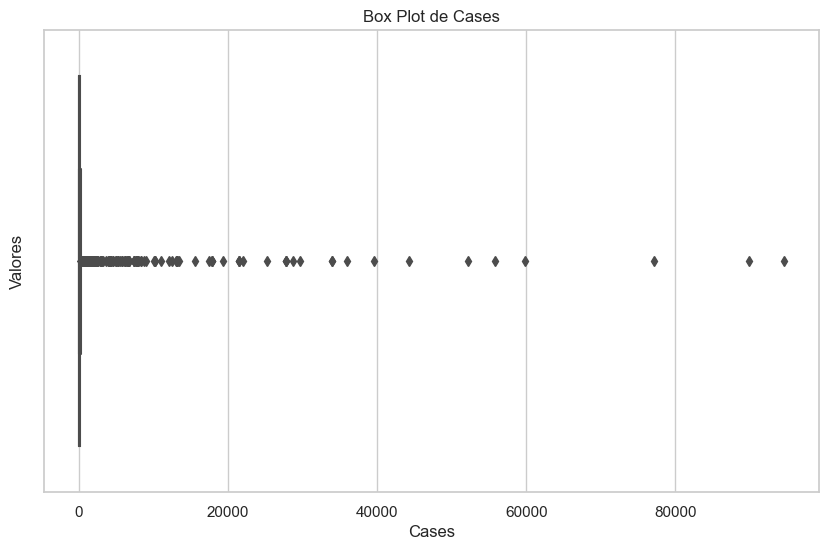

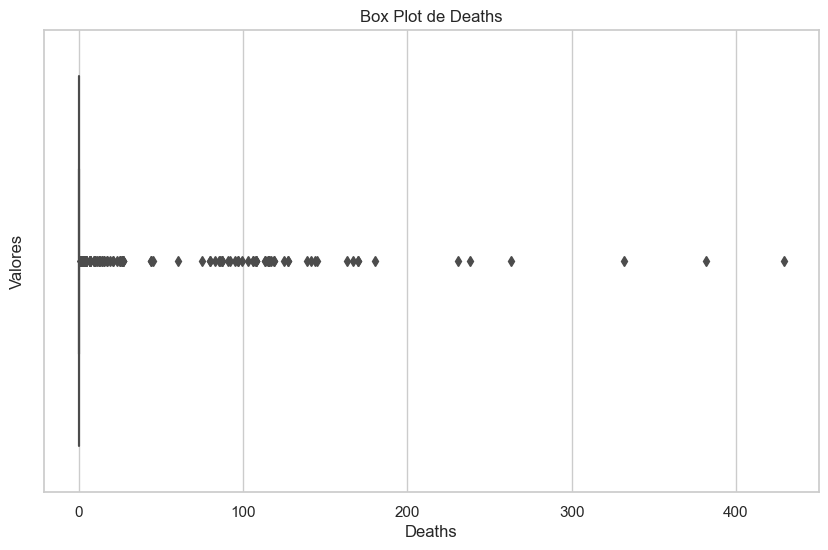

In [12]:
sns.boxplot(x=data['cases'])
plt.title('Box Plot de Cases')
plt.xlabel('Cases')
plt.ylabel('Valores')
plt.show()

# Crear box plot para la columna 'deaths'
sns.boxplot(x=data['deaths'])
plt.title('Box Plot de Deaths')
plt.xlabel('Deaths')
plt.ylabel('Valores')
plt.show()

In [13]:
def percentage_outliers(column):
    # Calcular el rango intercuartílico (IQR)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los valores atípicos
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    # Calcular el porcentaje de valores atípicos en relación con el tamaño total de la columna
    percentage = len(outliers) / len(column) * 100

    return percentage

In [14]:
percentage_cases = percentage_outliers(data['cases'])
percentage_deaths = percentage_outliers(data['deaths'])

print(f"Porcentaje de valores atípicos para columna cases: {percentage_cases}%")
print(f"Porcentaje de valores atípicos para columna deaths: {percentage_deaths}%")

Porcentaje de valores atípicos para columna cases: 16.136114160263446%
Porcentaje de valores atípicos para columna deaths: 11.580680570801318%


### Normalización de Texto en Columnas Categóricas

In [15]:
def registros_con_espacios(data, columna):
    registros_espacios = []

    # Verificar si algún valor en la columna tiene espacios iniciales o finales
    for indice, valor in data[columna].items():
        if isinstance(valor, str) and (valor.startswith(' ') or valor.endswith(' ')):
            registros_espacios.append(indice)

    return registros_espacios

# Uso de la función para la columna 'country'
registros_espacios_country = registros_con_espacios(data, 'country')
print("Registros con espacios iniciales o finales en la columna 'Country':", registros_espacios_country)

Registros con espacios iniciales o finales en la columna 'Country': []


In [16]:
# de cualquier forma quiero asegurarme que los datos no tengan. Así que es mejor aplicar las funciones.
data['country'] = data['country'].str.lstrip()
data['country'] = data['country'].str.strip()

In [17]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   country      1822 non-null   object        
 1   cases        1822 non-null   int32         
 2   deaths       1822 non-null   Int32         
 3   update_time  1822 non-null   datetime64[ns]
dtypes: Int32(1), datetime64[ns](1), int32(1), object(1)
memory usage: 44.6+ KB


,country,cases,deaths,update_time
0,Algeria,5,0,2009-07-06
1,Antigua and Barbuda,2,0,2009-07-06
2,Argentina,2485,60,2009-07-06
3,Australia,5298,10,2009-07-06
4,Austria,19,0,2009-07-06


El tipo de datos int32 puede representar números enteros en un rango que va desde -2,147,483,648 hasta 2,147,483,647. Este rango incluye un total de 4,294,967,296 valores enteros distintos, tanto positivos como negativos, excluyendo el cero.

#### Corrección especial, inconsistencia de los registros de country

Pycountry es una biblioteca de Python que proporciona acceso a información detallada sobre países y territorios de todo el mundo. Permite buscar y recuperar datos sobre nombres de países, códigos de país, nombres oficiales y nombres comunes, entre otros. La función corregir_nombre_pais(nombre_pais) que se utilizó en el proceso de limpieza de datos toma un nombre de país como entrada y busca una coincidencia aproximada utilizando la funcionalidad de búsqueda difusa de pycountry. Si encuentra una coincidencia, devuelve el nombre oficial del país corregido. En caso de no encontrar una coincidencia, devuelve el nombre original del país. 

In [18]:
def corregir_nombre_pais(dataframe, columna_pais):
    corrected_countries = []
    corrected_flags = []
    
    for nombre_pais in dataframe[columna_pais]:
        try:
            # Buscar país por nombre común
            pais = pycountry.countries.search_fuzzy(nombre_pais)[0]
            corrected_countries.append(pais.name)
            corrected_flags.append(1)
        except LookupError:
            # Si no se encuentra el país, mantener el nombre original y establecer la bandera de corrección en 0
            corrected_countries.append(nombre_pais)
            corrected_flags.append(0)
    
    # Agregar las listas corregidas como nuevas columnas al DataFrame
    dataframe['corrected_country'] = corrected_countries
    dataframe['corrected'] = corrected_flags

# Llamar a la función y aplicarla al DataFrame 'data', especificando el nombre de la columna 'country'
corregir_nombre_pais(data, 'country')


In [19]:
data[data['country'] != data['corrected_country']]

,country,cases,deaths,update_time,corrected_country,corrected
11,Bolivia,416,0,2009-07-06,"Bolivia, Plurinational State of",1
24,Cook Island,1,0,2009-07-06,Cook Islands,1
26,Cote d'Ivoire,2,0,2009-07-06,Côte d'Ivoire,1
30,Czech Republic,15,0,2009-07-06,Czechia,1
56,"Iran, Islamic Republic",1,0,2009-07-06,"Iran, Islamic Republic of",1
...,...,...,...,...,...,...
1729,United States of America,6764,10,2009-05-26,United States,1
1769,Russia,1,0,2009-05-25,Russian Federation,1
1776,United States of America,6552,9,2009-05-25,United States,1
1813,Russia,1,0,2009-05-23,Russian Federation,1


In [20]:
data[data['country'] == data['corrected_country']]

,country,cases,deaths,update_time,corrected_country,corrected
0,Algeria,5,0,2009-07-06,Algeria,1
1,Antigua and Barbuda,2,0,2009-07-06,Antigua and Barbuda,1
2,Argentina,2485,60,2009-07-06,Argentina,1
3,Australia,5298,10,2009-07-06,Australia,1
4,Austria,19,0,2009-07-06,Austria,1
...,...,...,...,...,...,...
1816,Switzerland,2,0,2009-05-23,Switzerland,1
1817,Thailand,2,0,2009-05-23,Thailand,1
1818,Turkey,2,0,2009-05-23,Turkey,1
1819,United Kingdom,117,0,2009-05-23,United Kingdom,1


Comenzando con la configuración del número máximo de filas a mostrar a 150 utilizando pd.set_option('display.max_rows', 150), al inspeccionar los valores corregidos después de aplicar la función corregir_nombre_pais(), se identificaron ciertos patrones no deseados en los datos. Estos incluían la presencia de asteriscos (*) en algunos nombres de países y la existencia de la columna 'Grand Total'. Para abordar estos problemas, se procedió a eliminar los asteriscos de los nombres de países y a eliminar la columna 'Grand Total' del conjunto de datos. Además, se realizaron pasos adicionales para eliminar cualquier espacio en blanco adicional al principio o al final de los valores en la columna 'country'.

In [21]:
pd.set_option('display.max_rows', 150) 
data['corrected_country'].value_counts().reset_index()

,index,corrected_country
0,Malaysia,22
1,Panama,22
2,New Zealand,22
3,Germany,22
4,Russian Federation,22
5,India,22
6,Cuba,22
7,Japan,22
8,Ireland,22
9,Denmark,22


In [22]:
data['country'] = data['country'].str.replace('*', '')
data['country'] = data['country'].str.replace('"', '')

/Users/d3r/opt/miniconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [23]:
data = data[~data['country'].str.contains('Grand Total')]

In [24]:
data['country'] = data['country'].str.lstrip()
data['country'] = data['country'].str.strip()

In [25]:
data

,country,cases,deaths,update_time,corrected_country,corrected
0,Algeria,5,0,2009-07-06,Algeria,1
1,Antigua and Barbuda,2,0,2009-07-06,Antigua and Barbuda,1
2,Argentina,2485,60,2009-07-06,Argentina,1
3,Australia,5298,10,2009-07-06,Australia,1
4,Austria,19,0,2009-07-06,Austria,1
...,...,...,...,...,...,...
1816,Switzerland,2,0,2009-05-23,Switzerland,1
1817,Thailand,2,0,2009-05-23,Thailand,1
1818,Turkey,2,0,2009-05-23,Turkey,1
1819,United Kingdom,117,0,2009-05-23,United Kingdom,1


Finalmente, se exportó el DataFrame limpio a un archivo CSV llamado 'h1n1_clean.csv' con codificación UTF-8.

In [26]:
data.rename(columns={'corrected_country': 'country', 'country': 'country_old'}, inplace=True)
data.to_csv('h1n1_clean.csv', index=False, encoding='utf-8')